In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model, metrics

### Data Understanding

In [2]:
# membaca data
data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# mengecek missing value
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Tidak terdapat missing value

In [5]:
# mengecek data duplikat
data.duplicated().sum()

0

Tidak terdapat data duplikat

In [6]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Exploratory Data Analysis

In [7]:
# mengecek data kategori
categorical_column = data.dtypes==object
categorical_data = data.columns[categorical_column].tolist()

In [8]:
for i in range(len(categorical_data)):
    print("data unik dari {} adalah :\n{}\n".format(categorical_data[i], data[categorical_data[i]].unique()))

data unik dari CarName adalah :
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'b

Untuk dapat mengetahui pengaruh dari brand, maka kolom `CarName` akan dirubah berdasarkan kata pertama dari kolom tersebut yang merupakan sebuah brand.

In [9]:
# membuat kolom baru untuk brand
data['Brand'] = data['CarName'].apply(lambda x : x.split()[0])

In [10]:
data['Brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Terdapat kesalahan ketik pada nama brand.

In [11]:
# rename brand
data['Brand'] = data['Brand'].replace({'maxda': 'mazda',
                                    'Nissan': 'nissan',
                                    'porcshce': 'porsche',
                                    'toyouta': 'toyota',
                                    'vokswagen': 'volkswagen',
                                    'vw': 'volkswagen'})

In [12]:
data['Brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Nama brand sudah benar.

In [13]:
# Convert data yang memiliki 2 value menjadi 1 dan 0

data['fueltype'] = data['fueltype'].map({'gas': 1, 'diesel': 0})
data['aspiration'] = data['aspiration'].map({'std': 1, 'turbo': 0})
data['doornumber'] = data['doornumber'].map({'two': 2, 'four': 4})
data['enginelocation'] = data['enginelocation'].map({'front': 1, 'rear': 0})

In [14]:
# Convert `symboling` menjadi categorical value, karena numeric value tidak memiliki bobot (arti)

def replace_values(a,b):
    data.symboling.replace(a,b,inplace=True)

replace_values(3,'Very_Risky')
replace_values(2,'Moderately_Risky')
replace_values(1,'Neutral')
replace_values(0,'Safe')
replace_values(-1,'Moderately_Safe')
replace_values(-2,'Very_Safe')

In [15]:
# convert `cylindernumber` ke numerical

def replace_values(a,b):
    data.cylindernumber.replace(a,b,inplace=True)

replace_values('four', 4)
replace_values('six', 6)
replace_values('five', 5)
replace_values('three', 3)
replace_values('twelve', 12)
replace_values('two', 2)
replace_values('eight', 8)


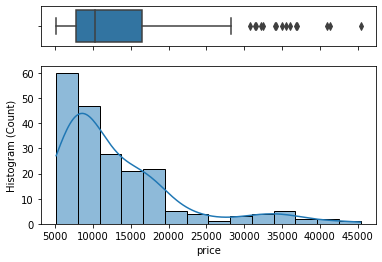

In [16]:
# histogram & outlier `price`

sns.color_palette("pastel")
fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios':(.2, .8)})
    
sns.boxplot(data = data, x = 'price', ax = ax_box)
sns.histplot(data = data, x = 'price', ax = ax_hist, kde=True)
    
ax_box.set(xlabel = '')
ax_hist.set(ylabel = 'Histogram (Count)')
    
plt.show()

Distribusi harga memiliki plot right skewed.

In [17]:
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

data.loc[(data['price'] < fence_low) | (data['price'] > fence_high)].sort_values('price')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
15,16,Safe,bmw x4,1,1,4,sedan,rwd,1,103.5,...,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,bmw
129,130,Neutral,porsche cayenne,1,1,2,hatchback,rwd,1,98.4,...,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5,porsche
70,71,Moderately_Safe,buick skyhawk,0,0,4,sedan,rwd,1,115.6,...,idi,3.58,3.64,21.5,123,4350,22,25,31600.0,buick
47,48,Safe,jaguar xj,1,1,4,sedan,rwd,1,113.0,...,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0,jaguar
126,127,Very_Risky,porcshce panamera,1,1,2,hardtop,rwd,0,89.5,...,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.0,porsche
127,128,Very_Risky,porsche cayenne,1,1,2,hardtop,rwd,0,89.5,...,mpfi,3.74,2.90,9.5,207,5900,17,25,34028.0,porsche
71,72,Moderately_Safe,buick opel isuzu deluxe,1,1,4,sedan,rwd,1,115.6,...,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,buick
72,73,Very_Risky,buick skylark,1,1,2,convertible,rwd,1,96.6,...,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0,buick
48,49,Safe,jaguar xf,1,1,4,sedan,rwd,1,113.0,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0,jaguar
49,50,Safe,jaguar xk,1,1,2,sedan,rwd,1,102.0,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar


Data outlier bukan data yang janggal. Berdasarkan `CarName`, data yang tersebar pada range 5.000 - 15.000, sehingga data yang lebih mahal dianggap outlier.

In [18]:
# drop `car_ID`
data = data.drop(['car_ID'],axis=1)

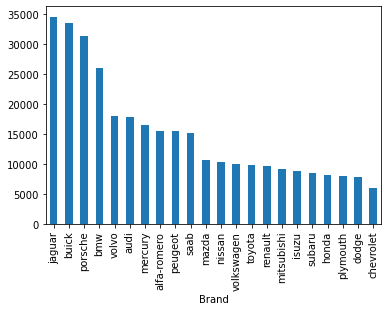

In [19]:
# grafik `Brand` vs mean `price`
data.groupby(['Brand'])['price'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

jaguar, buick, dan porsche memiliki harga rata-rata tertinggi.

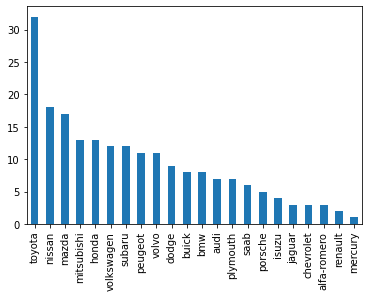

In [20]:
# grafik `Brand` vs mean `price`
data['Brand'].value_counts().plot(kind = 'bar')
plt.show()

toyota merupakan mobil paling favorit.

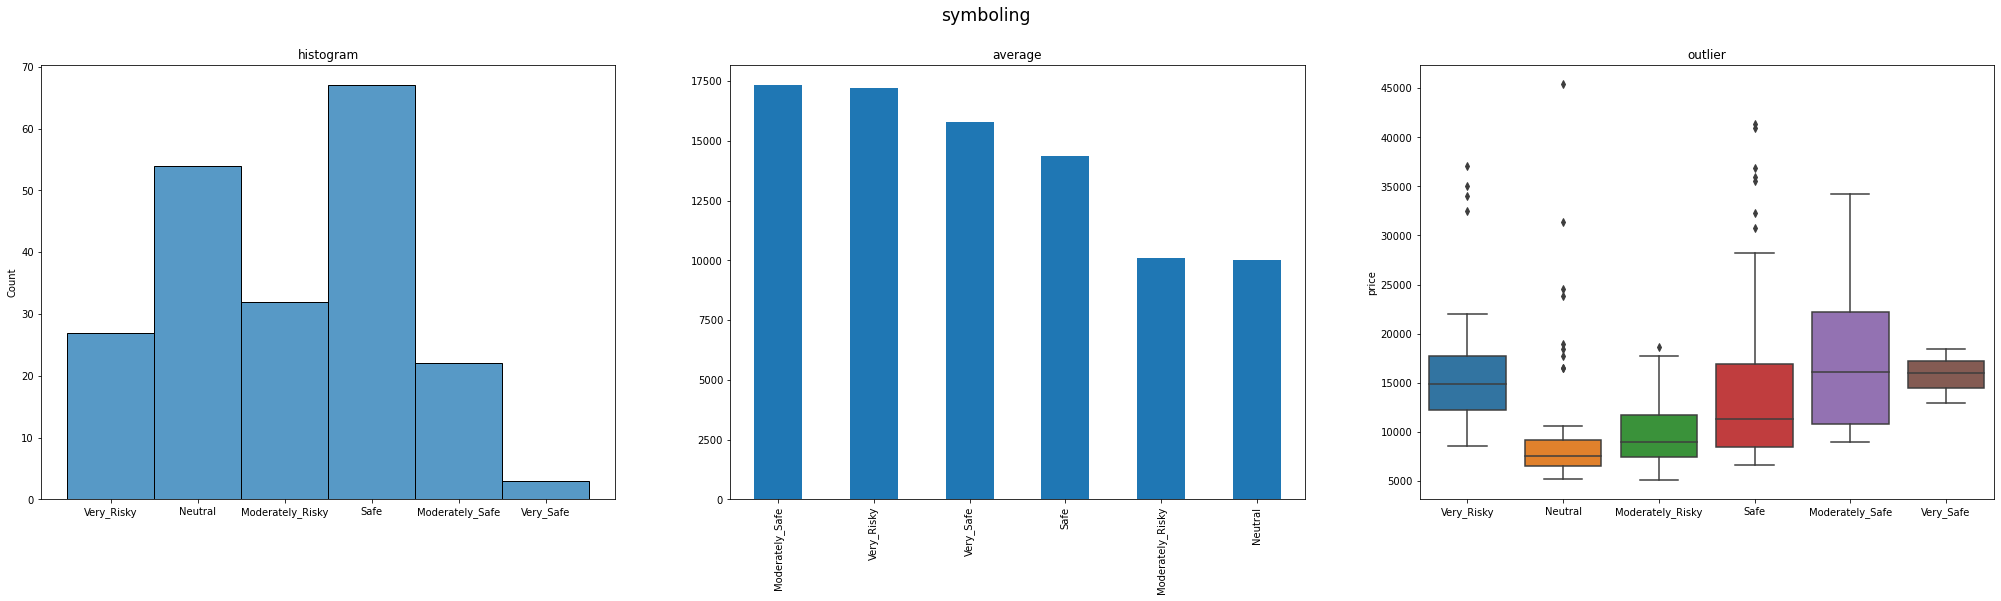

In [21]:
### categorical - symboling

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (35,8), sharey = False, sharex = False)

# plots
sns.histplot(data = data, x = 'symboling', ax = ax1)
data.groupby(['symboling'])['price'].mean().sort_values(ascending = False).plot(kind = 'bar', ax = ax2)
sns.boxplot(data = data, x = 'symboling', y = 'price', ax = ax3)

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax1.set_title('histogram')
ax2.set_title('average')
ax3.set_title('outlier')

fig.suptitle('symboling', fontsize = 'xx-large')
plt.show()

Faktor `symboling` mobil yang paling banyak digunakan adalah tingkat safe.
Tingkat Moderately_Safe dan Very_Risky memiliki harga tertinggi.
Harga `symboling` Moderately_Safe lebih tinggi dibandingkan dengan yang lainnya.

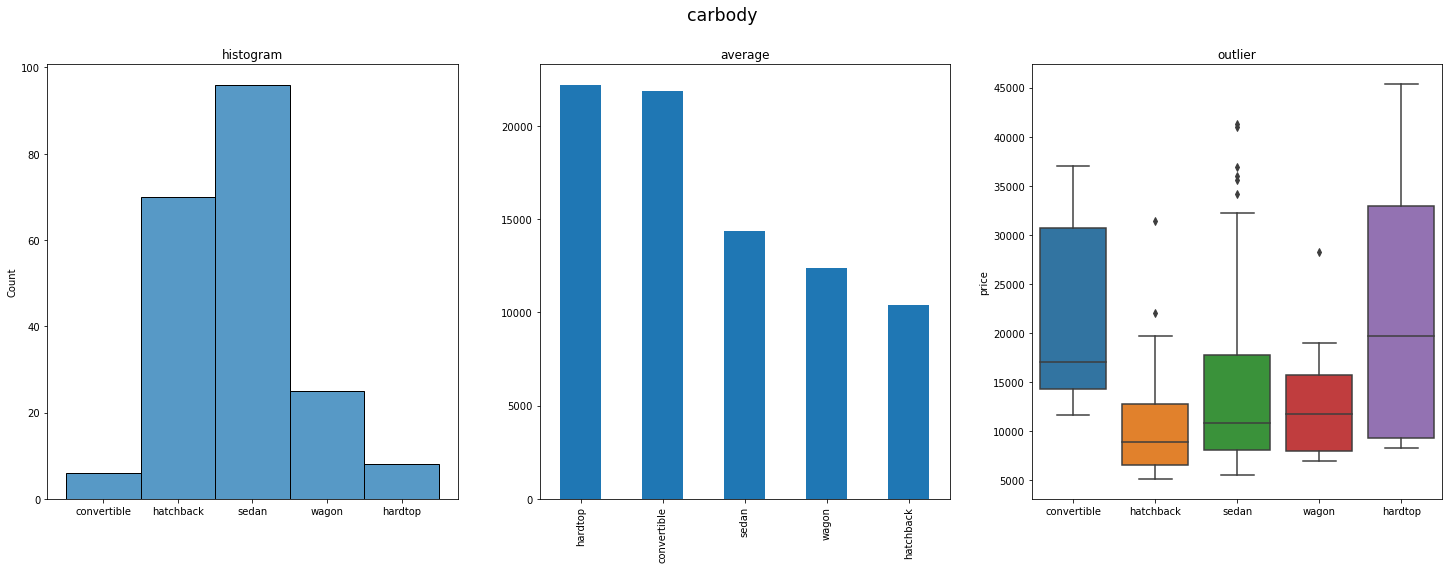

In [22]:
### categorical - carbody

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,8), sharey = False, sharex = False)

# plots
sns.histplot(data = data, x = 'carbody', ax = ax1)
data.groupby(['carbody'])['price'].mean().sort_values(ascending = False).plot(kind = 'bar', ax = ax2)
sns.boxplot(data = data, x = 'carbody', y = 'price', ax = ax3)

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax1.set_title('histogram')
ax2.set_title('average')
ax3.set_title('outlier')

fig.suptitle('carbody', fontsize = 'xx-large')
plt.show()

Sebagian besar `carbody` mobil adalah sedan dan hatchback.
Mobil dengan `carbody` hardtop dan convertible memiliki harga tertinggi.
Semua jenis `carbody` relatif lebih murah dibandingkan dengan `carbody` convertible.

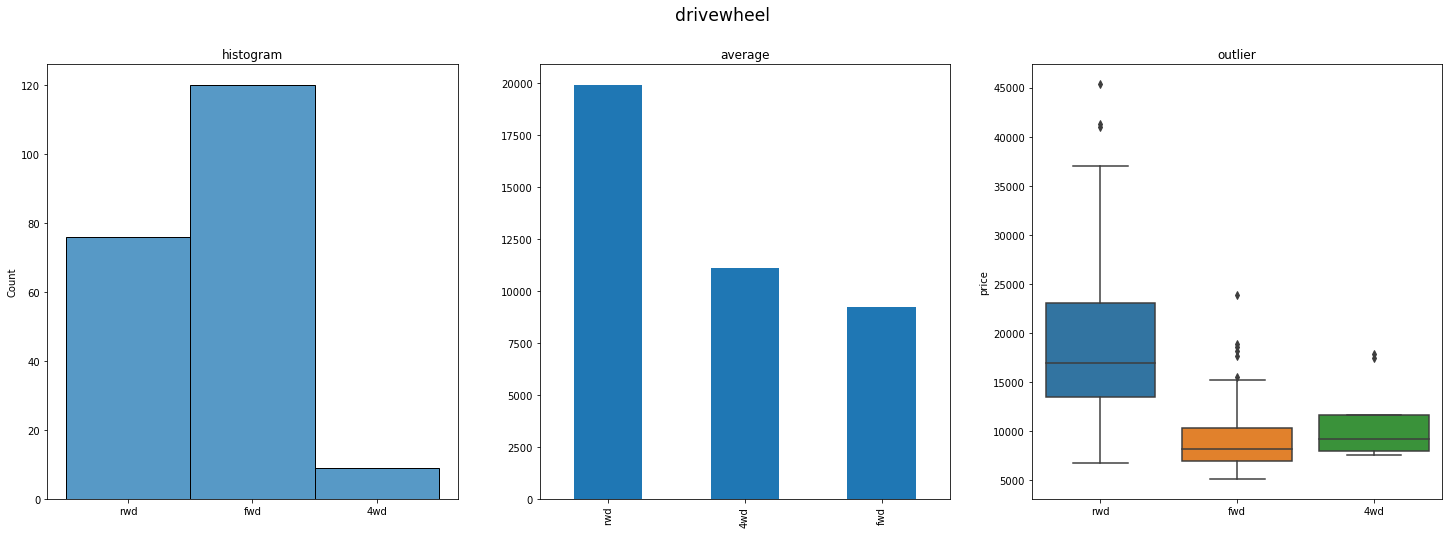

In [23]:
### categorical - drivewheel

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,8), sharey = False, sharex = False)

# plots
sns.histplot(data = data, x = 'drivewheel', ax = ax1)
data.groupby(['drivewheel'])['price'].mean().sort_values(ascending = False).plot(kind = 'bar', ax = ax2)
sns.boxplot(data = data, x = 'drivewheel', y = 'price', ax = ax3)

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax1.set_title('histogram')
ax2.set_title('average')
ax3.set_title('outlier')

fig.suptitle('drivewheel', fontsize = 'xx-large')
plt.show()

Sebagian besar `drivewheel` mobil merupakan fwd dan rwd.
Mobil dengan `drivewheel` rwd memiliki harga tertinggi.
Semua jenis `drivewheel` relatif lebih murah dibandingkan dengan `drivewheel` rwd.

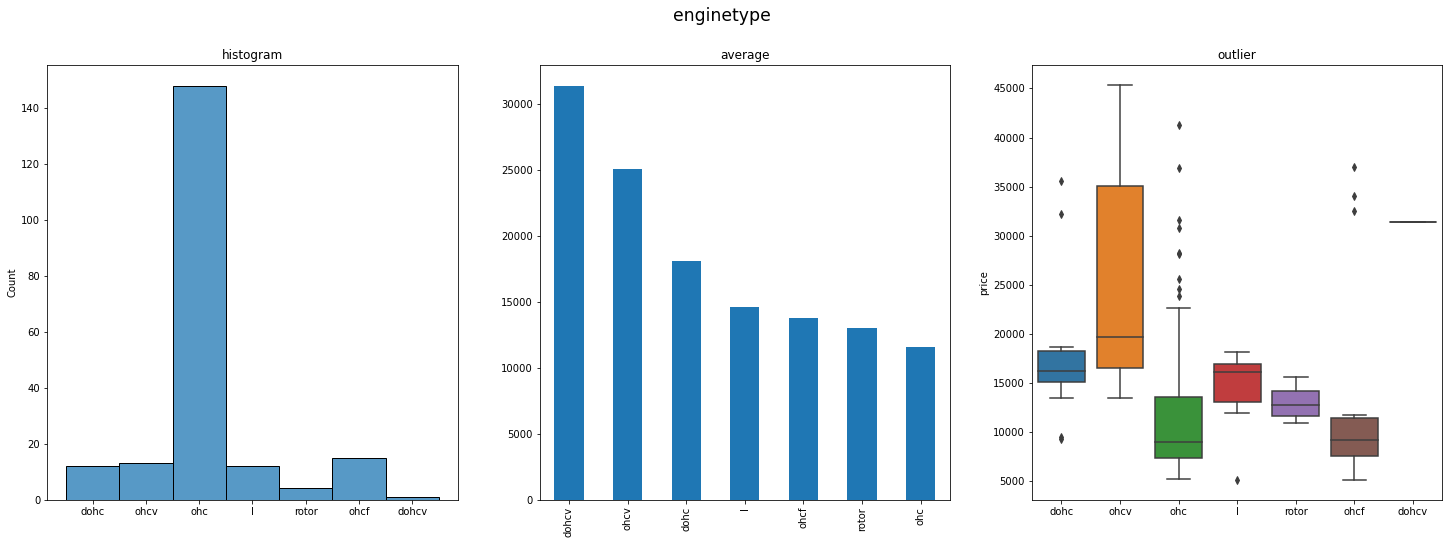

In [24]:
### categorical - enginetype

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,8), sharey = False, sharex = False)

# plots
sns.histplot(data = data, x = 'enginetype', ax = ax1)
data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False).plot(kind = 'bar', ax = ax2)
sns.boxplot(data = data, x = 'enginetype', y = 'price', ax = ax3)

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax1.set_title('histogram')
ax2.set_title('average')
ax3.set_title('outlier')

fig.suptitle('enginetype', fontsize = 'xx-large')
plt.show()

Sebagian besar `enginetype` mobil merupakan ohc.
Mobil dengan `enginetype` dohc memiliki harga tertinggi.
`enginetype` ohcv termasuk mobil dengan kisaran harga yang lebih tinggi.

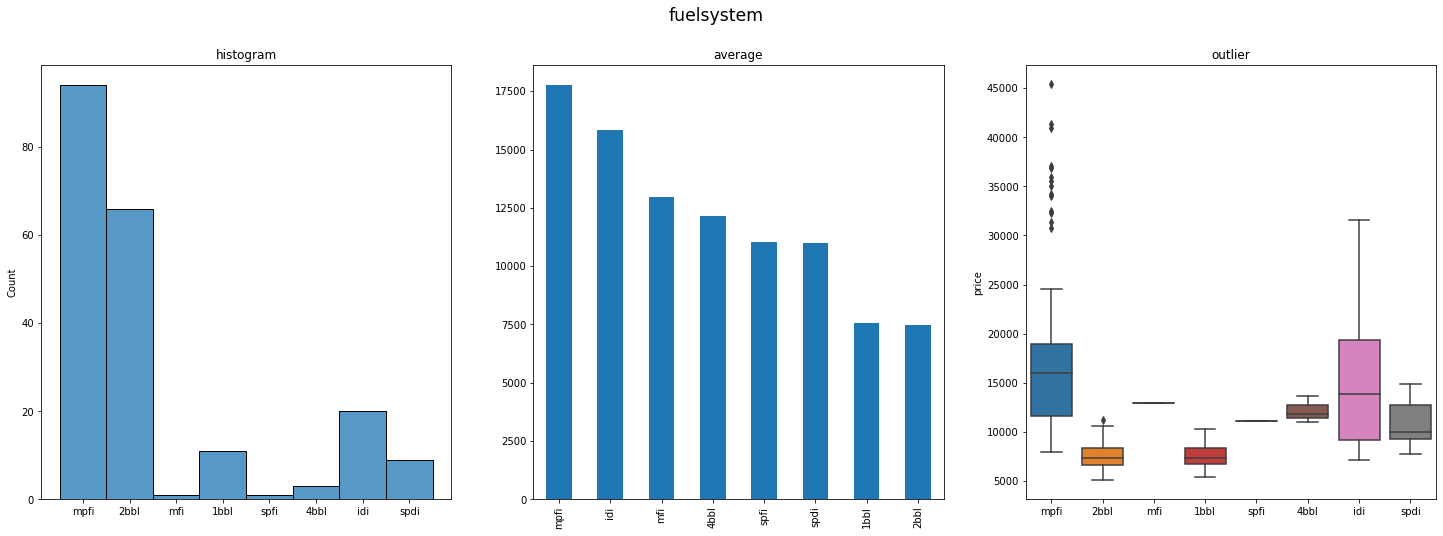

In [25]:
### categorical - fuelsystem

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,8), sharey = False, sharex = False)

# plots
sns.histplot(data = data, x = 'fuelsystem', ax = ax1)
data.groupby(['fuelsystem'])['price'].mean().sort_values(ascending = False).plot(kind = 'bar', ax = ax2)
sns.boxplot(data = data, x = 'fuelsystem', y = 'price', ax = ax3)

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax1.set_title('histogram')
ax2.set_title('average')
ax3.set_title('outlier')

fig.suptitle('fuelsystem', fontsize = 'xx-large')
plt.show()

Sebagian besar `fuelsystem` mobil merupakan mpfi dan 2bbl.
Mobil dengan `fuelsystem` mpfi memiliki harga tertinggi.
Kisaran mobil dengan harga tinggi memiliki `fuelsystem` idi.

In [26]:
# data numerik
numerical_column = data.select_dtypes(exclude=['object']).columns
numerical_data = data[numerical_column]

<AxesSubplot:>

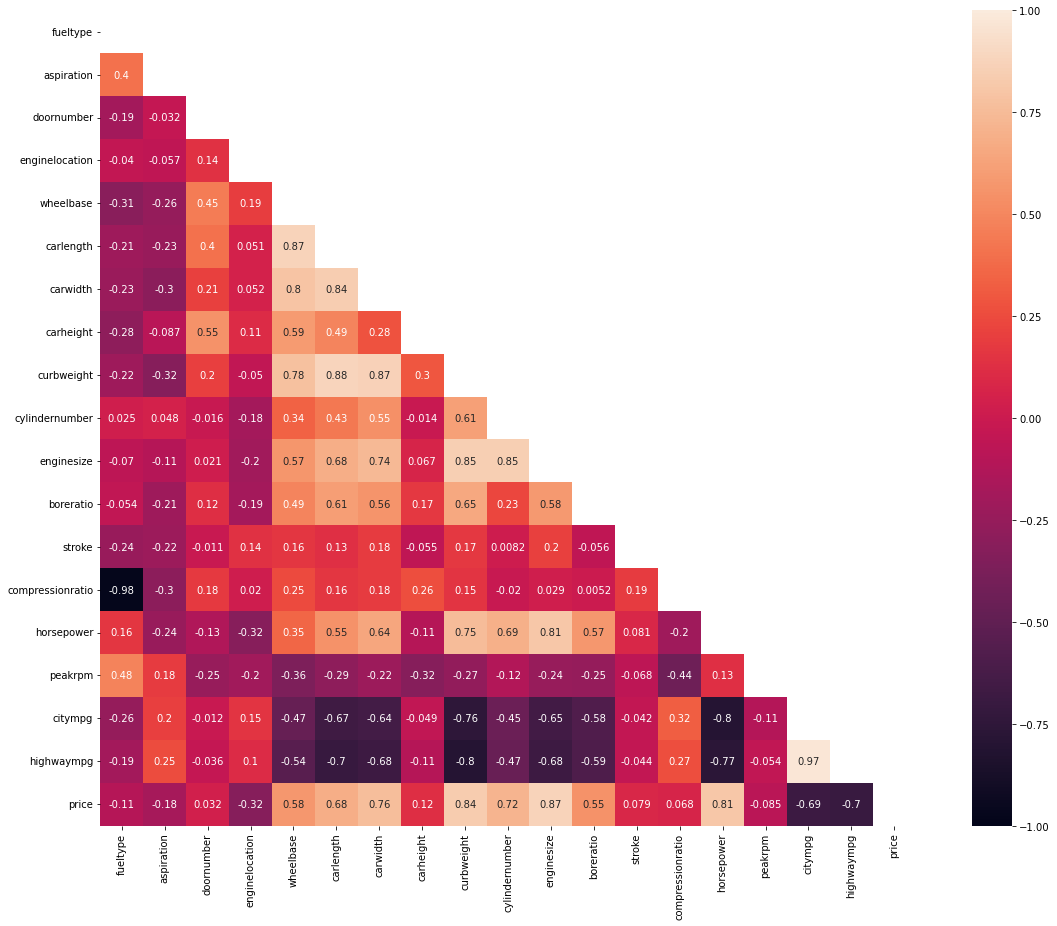

In [27]:
plt.figure(figsize=(20, 15))
mask = np.zeros_like(numerical_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(numerical_data.corr(), mask=mask, vmin=-1, vmax=1, annot = True, square=True)

`wheelbase`, `carlength`, dan `boreratio` berkorelasi kuat secara positif dengan `price`.
`carwidth`, `curbweight`, `cylindernumber`, `enginesize`, dan `horsepower` berkorelasi sangat kuat secara positif dengan `price`.
`citympg` dan `highwaympg` berkorelasi sangat kuat secara negatif dengan `price`.

In [28]:
data_model = data.copy()

In [29]:
data_model.drop(['fueltype', 'aspiration', 'enginelocation', 'carheight', 'stroke', 'compressionratio', 'peakrpm', 'doornumber', 'CarName'], axis=1, inplace=True)

In [30]:
data_encoding = pd.get_dummies(data_model)
data_encoding.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
0,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,2823,6,152,2.68,154,19,26,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,2337,4,109,3.19,102,24,30,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,2824,5,136,3.19,115,18,22,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X = data_encoding.loc[:, data_encoding.columns != 'price']
y = data_encoding['price']

In [32]:
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'symboling_Moderately_Risky', 'symboling_Moderately_Safe',
       'symboling_Neutral', 'symboling_Safe', 'symboling_Very_Risky',
       'symboling_Very_Safe', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'Brand_alfa-romero', 'Brand_audi', 'Brand_bmw',
       'Brand_buick', 'Brand_chevrolet', 'Brand_dodge', 'Brand_honda',
       'Brand_isuzu', 'Brand_jaguar', 'Brand_mazda', 'Brand_mercury',
       'Brand_

In [33]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [34]:
 # create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

# regression intercept
print('Intercept: ', reg.intercept_)


Coefficients:  [ 3.27469843e+02 -1.64707897e+02  9.44987112e+02  1.73884804e+00
 -4.29252597e+02  5.74459032e+01 -2.09616774e+03  3.64627236e+01
  1.12026357e+02 -1.00887811e+02  1.66853635e+02 -1.32300106e+03
  8.28281850e+02  1.17004636e+03  1.56787293e+02 -9.98968083e+02
  2.59436982e+03 -4.14220317e+02 -8.63680866e+02 -3.55806101e+02
 -9.60662532e+02  4.97946380e+02 -4.07127337e+02 -9.08190422e+01
 -6.83493825e+02 -4.43823714e+03 -2.21810139e+03 -1.95740183e+03
  9.52659308e+03 -1.55657437e+03  1.32721547e+03 -4.48461624e+03
  2.41465461e+02  1.32721547e+03  2.75024568e+02  1.81898940e-12
 -2.73104010e+02  1.56263753e+03  1.35137722e+03  1.49404587e+03
  1.06807410e+03  6.88405816e+03  8.68811021e+03 -2.77056948e+03
 -2.22248530e+03  1.74176198e+03 -7.78265756e+02  3.37339769e+03
 -1.48216802e+03 -2.06730009e+03 -2.96365014e+03 -2.13235474e+03
 -2.21810139e+03 -1.73793059e+03  6.35870645e+03 -5.48097373e+02
  3.43143026e+03 -1.34860937e+04 -1.93159608e+03 -7.05412868e+02
  2.004440

Variance score: 0.9030080861349946


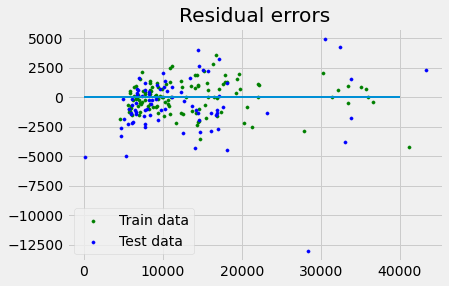

In [35]:
 # variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 40000, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'best')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [36]:
y_pred = reg.predict(X_test)

In [37]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1761.427552947884

Berdasarkan MAE, nilai error `Price` dapat mencapai +- 1.761,428.

In [38]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2491.801583207311

Berdasarkan RMSE, nilai error `Price` dapat mencapai +- 2.491,802.

In [39]:
# R2

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9030080861349946

Berdasarkan R2, korelasi linier antara input dengan target sebesar 0,903.

In [40]:
# ridge regression

from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', model.coef_)

# regression intercept
print('Intercept: ', model.intercept_)

Coefficients:  [ 1.70243804e+02 -6.05733864e+01  4.41210368e+02  2.15133430e+00
  3.78728920e+02  5.25429613e+01 -1.73179459e+03  4.61856648e+01
  3.66261084e+01 -2.93889636e+01 -4.53152268e+02 -3.49308825e+02
  3.42665672e+02  2.05223224e+02  8.88836096e+02 -6.34263900e+02
  2.37119146e+03  7.15795185e+02 -1.39382869e+03 -4.54199935e+02
 -1.23895801e+03 -1.07575170e+02 -3.99838114e+02  5.07413284e+02
 -8.73451100e+02 -2.09902564e+03 -8.06299411e+02  2.60963820e+01
  3.43250982e+03 -9.70978682e+02  1.29114864e+03 -1.13916620e+03
 -2.99618093e+02  1.29114864e+03  7.68734309e+02  0.00000000e+00
 -2.90739390e+02 -4.98927112e+02  1.68567843e+02 -1.27989394e+02
  1.40316300e+03  3.67531263e+03  5.80203973e+03 -7.70621965e+02
 -1.11453248e+03  1.20397449e+02 -5.67906529e+02 -1.03073598e+03
 -3.59948974e+02 -1.03552549e+03 -2.11075495e+03 -2.12674338e+03
 -8.06299411e+02 -1.23097464e+03  5.16467672e+03 -2.56162876e+02
  1.90634942e+03 -3.86070291e+03 -2.09034304e+03 -7.32828237e+02
  1.501312

Variance score: 0.8992967786170083


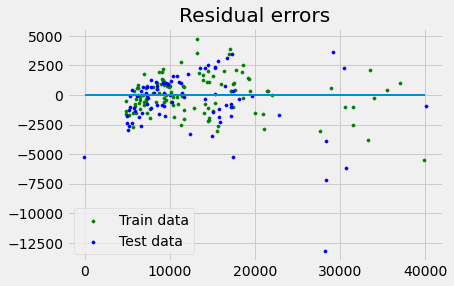

In [41]:
 # variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 40000, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'best')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [42]:
y_pred = model.predict(X_test)

In [43]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1699.4189736105063

Berdasarkan MAE, nilai error `Price` dapat mencapai +- 1.699,419.

In [44]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2539.0273240461515

Berdasarkan RMSE, nilai error `Price` dapat mencapai +- 2.539,027.

In [45]:
# R2

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8992967786170083

Berdasarkan R2, korelasi linier antara input dengan target sebesar 0,899.

In [46]:
# lasso regression

from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', model.coef_)

# regression intercept
print('Intercept: ', model.intercept_)

Coefficients:  [ 2.99290196e+02 -1.49618098e+02  9.01075768e+02  1.69716903e+00
 -2.25496907e+02  5.43271734e+01 -1.90747038e+03  3.78551569e+01
  1.02703166e+02 -9.63873111e+01 -9.34616083e+00 -1.38406824e+03
  5.97469593e+02  9.21611114e+02  2.39096371e+00 -1.09497301e+03
  2.91697489e+03 -0.00000000e+00 -4.93751371e+02  1.30571845e+01
 -5.89578324e+02  5.29718259e+02 -2.87175375e+02 -0.00000000e+00
  8.88203224e+02 -3.05261442e+03 -1.59101639e+03 -1.00882890e+02
  1.06669977e+04  0.00000000e+00  4.08580521e+03 -4.33025594e+03
 -1.77005437e+02  3.57300392e+01  0.00000000e+00  0.00000000e+00
 -6.08945271e+02  9.63823395e+02  7.43779703e+02  2.16661127e+03
  1.75676904e+03  7.34946890e+03  9.39792165e+03 -1.74157365e+03
 -1.34871981e+03  2.15193696e+03  7.96994719e+00  3.13650652e+03
 -6.12528645e+02 -1.16366831e+03 -2.11993343e+03 -1.38545492e+03
 -5.89760677e-01 -9.07036939e+02  7.01791113e+03  0.00000000e+00
  3.97101781e+03 -1.19897714e+04 -1.18054633e+03 -0.00000000e+00
  2.624771

Variance score: 0.9034773027850612


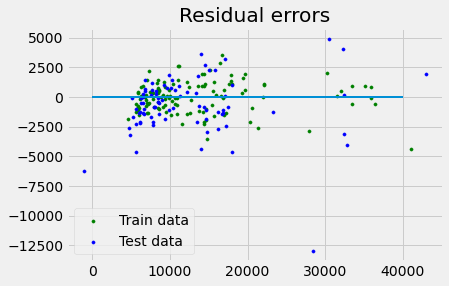

In [47]:
 # variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 40000, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'best')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [48]:
y_pred = model.predict(X_test)

In [49]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1720.1596259719397

Berdasarkan MAE, nilai error `Price` dapat mencapai +- 1.720,160.

In [50]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2485.7669962732066

Berdasarkan RMSE, nilai error `Price` dapat mencapai +- 2.485,767.

In [51]:
# R2

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9034773027850612

Berdasarkan R2, korelasi linier antara input dengan target sebesar 0,903.

In [52]:
# elasticnet regression

from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', model.coef_)

# regression intercept
print('Intercept: ', model.intercept_)

Coefficients:  [  32.18582984  -68.31136302  493.14627161    3.13327233   30.95017482
   81.14279364 -103.34361739   47.52979786  -19.56797481   -1.18836199
 -143.50580786   38.32669177   34.11753852 -166.61738582  294.68344336
  -57.00448115  292.40589272  172.65826229 -478.50963115  133.2203214
 -120.77484363  -60.90925965 -248.46101731  310.37027562 -152.89266289
  -46.32871725  -61.01996227   76.83301527  285.74032256 -216.2637743
  114.93177828    9.56828768 -158.41006119  114.93177832  235.15169728
    0.           39.02114588 -226.66819023  -14.59465841    4.60213264
  146.2954933   260.02114466  399.10835438   10.50621141   21.55647289
   42.27143678    3.62750009 -113.43877645  112.84974488  -51.73649101
 -357.88196395 -320.30418508  -61.0199618   -21.16725719  416.49301013
  -34.54199649  102.51101284 -143.39023073 -396.84024684   44.3521768
  -65.87357987]
Intercept:  -32964.86351761433


Variance score: 0.8451092137929559


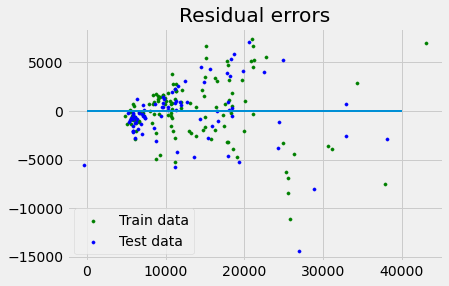

In [53]:
 # variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 40000, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'best')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [54]:
y_pred = model.predict(X_test)

In [55]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2160.8474844473703

Berdasarkan MAE, nilai error `Price` dapat mencapai +- 2.160,847.

In [56]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

3148.897216587652

Berdasarkan RMSE, nilai error `Price` dapat mencapai +- 3.148,897.

In [57]:
# R2

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8451092137929559

Berdasarkan R2, korelasi linier antara input dengan target sebesar 0,845.

In [116]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

Variance score: 0.9359319832942709


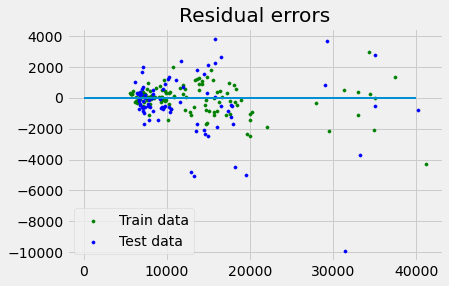

In [117]:
 # variance score: 1 means perfect prediction
print('Variance score: {}'.format(rf.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(rf.predict(X_train), rf.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(rf.predict(X_test), rf.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 40000, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'best')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [118]:
y_pred = rf.predict(X_test)

In [119]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1333.7599942566785

Berdasarkan MAE, nilai error `Price` dapat mencapai +- 1.333,760.

In [120]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2025.1926055175275

Berdasarkan RMSE, nilai error `Price` dapat mencapai +- 2.025,193.

In [121]:
# R2

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9359319832942709

Berdasarkan R2, korelasi linier antara input dengan target sebesar 0,935.

Berdasarkan nilai R2 dari berbagai model, model RandomForestRegressor merupakan model terbaik untuk dipilih karena memiliki nilai R2 terbesar.

In [100]:
rf.feature_importances_

array([1.86475401e-02, 5.82315856e-03, 2.04336257e-02, 1.54848338e-01,
       2.27307601e-03, 6.38466849e-01, 4.94177483e-03, 4.19188367e-02,
       1.64325105e-02, 7.56493767e-02, 2.40098162e-04, 1.64682055e-04,
       6.48574185e-04, 3.67576233e-04, 2.32768073e-04, 8.52634367e-05,
       1.22987525e-03, 2.31577701e-04, 4.92262962e-04, 1.17027678e-03,
       1.27596524e-03, 3.13666143e-04, 7.10569846e-04, 6.60906598e-04,
       8.17618676e-05, 1.13094155e-04, 4.46376412e-05, 2.74017120e-03,
       5.93673584e-05, 5.84413791e-04, 1.23483758e-05, 2.33866171e-06,
       9.49191741e-04, 8.39377988e-06, 3.55902608e-04, 0.00000000e+00,
       5.00871736e-04, 1.12395577e-04, 2.49273199e-05, 6.47429247e-05,
       5.80650552e-04, 3.80061452e-03, 3.84167218e-05, 1.19248339e-05,
       2.05537614e-05, 9.63717648e-05, 1.91104835e-04, 3.19362415e-05,
       3.98291912e-04, 1.24799483e-05, 6.92443595e-05, 5.34031659e-05,
       2.53285618e-04, 2.98214288e-05, 5.77943454e-04, 5.05132640e-06,
      

In [101]:
feature = pd.Series(rf.feature_importances_, index=X.columns)
feature.sort_values(ascending=False, inplace=True)
print(feature.head(10))

enginesize    0.638467
curbweight    0.154848
highwaympg    0.075649
horsepower    0.041919
carwidth      0.020434
wheelbase     0.018648
citympg       0.016433
carlength     0.005823
boreratio     0.004942
Brand_bmw     0.003801
dtype: float64


In [102]:
# hyperparameter tuning

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [103]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,25,50,100,200],
    'n_estimators': [5,10,25,50,100,200]
}

In [104]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 25, 50, 100, 200],
                         'n_estimators': [5, 10, 25, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [105]:
grid_search.best_score_

nan

In [106]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, min_samples_leaf=5, n_estimators=5,
                      n_jobs=-1, random_state=42)

Variance score: 0.8871357457575699


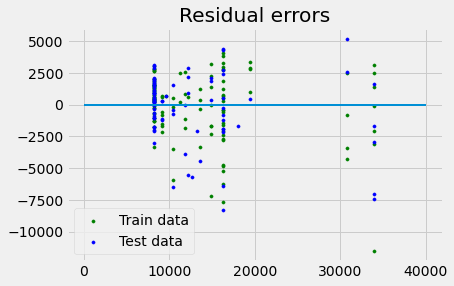

In [107]:
 # variance score: 1 means perfect prediction
print('Variance score: {}'.format(rf_best.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(rf_best.predict(X_train), rf_best.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(rf_best.predict(X_test), rf_best.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 40000, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'best')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [108]:
y_pred = rf_best.predict(X_test)

In [109]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1960.7384667187985

Berdasarkan MAE, nilai error `Price` dapat mencapai +- 1.960,738.

In [110]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2687.9668048296608

Berdasarkan RMSE, nilai error `Price` dapat mencapai +- 2.687,967.

In [111]:
# R2

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.88713574575757

Berdasarkan R2, korelasi linier antara input dengan target sebesar 0,887.

Setelah melakukan hyperparameter tuning, model sebelum dilakukan hyperparameter tuning memiliki nilai R2 tertinggi.